1. Buat model Deep learning (PyTorch and Tensorflow).
2. Gunakan Matriks Evaluasi (RMSE,MSE,RSquared)
3. Beri penjelasan untuk setiap persamaan matematika yang ada.

In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load dataset
df = pd.read_csv("secondhanddataset.csv")

# Handle missing values
df.fillna(df.median(), inplace=True)


In [5]:
# Separate features and target
X = df.drop(columns=["current price"])
y = df["current price"]

In [6]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Normalize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#PyTorch

In [8]:
# Convert to PyTorch tensors
X_train_torch = torch.tensor(X_train, dtype=torch.float32)
y_train_torch = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_torch = torch.tensor(X_test, dtype=torch.float32)
y_test_torch = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

In [9]:
# PyTorch model
class PyTorchModel(nn.Module):
    def __init__(self):
        super(PyTorchModel, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [10]:

# Initialize and train PyTorch model
model_torch = PyTorchModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model_torch.parameters(), lr=0.001)

num_epochs = 100
loss_history = []

for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model_torch(X_train_torch)
    loss = criterion(outputs, y_train_torch)
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}")

Epoch [10/100], Loss: 110366294016.0000
Epoch [20/100], Loss: 110366056448.0000
Epoch [30/100], Loss: 110365704192.0000
Epoch [40/100], Loss: 110365163520.0000
Epoch [50/100], Loss: 110364385280.0000
Epoch [60/100], Loss: 110363303936.0000
Epoch [70/100], Loss: 110361837568.0000
Epoch [80/100], Loss: 110359928832.0000
Epoch [90/100], Loss: 110357454848.0000
Epoch [100/100], Loss: 110354317312.0000


In [11]:
# Predictions and evaluation (PyTorch)
y_pred_torch = model_torch(X_test_torch).detach().numpy()
rmse_torch = np.sqrt(mean_squared_error(y_test, y_pred_torch))
mse_torch = mean_squared_error(y_test, y_pred_torch)
r2_torch = r2_score(y_test, y_pred_torch)

#TensorFlow

In [12]:
# Convert to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train.values.reshape(-1, 1), dtype=tf.float32)
X_test_tf = tf.convert_to_tensor(X_test, dtype=tf.float32)
y_test_tf = tf.convert_to_tensor(y_test.values.reshape(-1, 1), dtype=tf.float32)


In [13]:
# TensorFlow model
model_tf = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])
model_tf.compile(optimizer='adam', loss='mse', metrics=['mse'])
history = model_tf.fit(X_train_tf, y_train_tf, epochs=num_epochs, verbose=1)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 110173036544.0000 - mse: 110173036544.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 113460936704.0000 - mse: 113460936704.0000
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 111989907456.0000 - mse: 111989907456.0000
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 105486319616.0000 - mse: 105486319616.0000
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 112879484928.0000 - mse: 112879484928.0000
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 109094068224.0000 - mse: 109094068224.0000
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 108841615360.0000 - mse: 108841615360.0000
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 114992209920.0000 - mse: 114992209920.0000
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 110672683008.0000 - mse: 110672683008.0000
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 110060584960.0000 - mse: 110060584

In [14]:
# Predictions and evaluation (TensorFlow)
y_pred_tf = model_tf.predict(X_test_tf)
rmse_tf = np.sqrt(mean_squared_error(y_test, y_pred_tf))
mse_tf = mean_squared_error(y_test, y_pred_tf)
r2_tf = r2_score(y_test, y_pred_tf)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [15]:
# Print results
print(f"PyTorch - RMSE: {rmse_torch}, MSE: {mse_torch}, R2: {r2_torch}")
print(f"TensorFlow - RMSE: {rmse_tf}, MSE: {mse_tf}, R2: {r2_tf}")

PyTorch - RMSE: 337399.17565684294, MSE: 113838203733.91714, R2: -5.771660653117585
TensorFlow - RMSE: 217210.69919828666, MSE: 47180487846.208565, R2: -1.8065292903762984


berdasarkan hasil evaluasi model diatas, pada RMSE untuk model Pytorch  mendapatkan hasil sebesar 337,339.17 yang dimana menunjukan tingkat kesalahan yang tinggi sedangkan untuk model Tensorflow mendapatkan hasil 217,210.7 yang lebih kecil dan menunjukan hasil prediksi yang lebih akurat dibandingkan PyTorch dimana RMSE sendiri mengukur akar dari rata-rata kuadrat selisih nilai aktual dan nilai prediksi. semakin kecil hasil prediksi maka akan mendekati nilai aktualnya.  

Pada MSE untuk model PyTorch mendapatkan hasil 113,838,203,733.92 yang menunjukan bahwa model memiliki prediksi yang buruk sedangkan untuk model Tensorflow mendapatkan hasil 47,180,487,846.21 bahwa model lebih baik dibandingkan PyTorch dimana MSE merupakan kuadrat dari RMSE yang cukup sensitif dengan outlier.

Pada R² untuk model PyTorch mendapatkan hasil sebesar -5.77 yang menunjukan model sangat buruk dan untuk model Tensorflow mendapatkan hasil sebesar -1.81 yang termasuk buruk tetapi lebih baik daripada PyTorch, dimana R² mengukur seberapa baik model menjelaskan variabilitas dalam sebuah data dimana jika hasil negatif menunjukan model gagal dalam memprediksi

Tensorflow lebih baik dibandingkan PyTorch dalam RMSE dan MSE tetapi tetap memiliki performa yang buruk karena R² negatif. Model tidak berhasil menangkap pola data dengan baik dengan kemungkinan terdapat outlier dalam dataset.

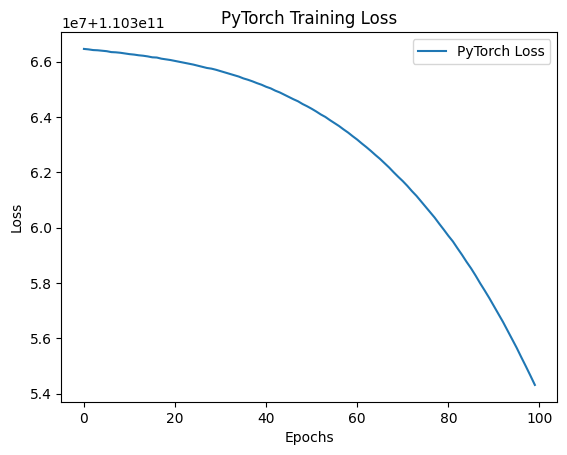

In [16]:
# Plot loss history for PyTorch
import matplotlib.pyplot as plt
plt.plot(range(num_epochs), loss_history, label='PyTorch Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('PyTorch Training Loss')
plt.legend()
plt.show()


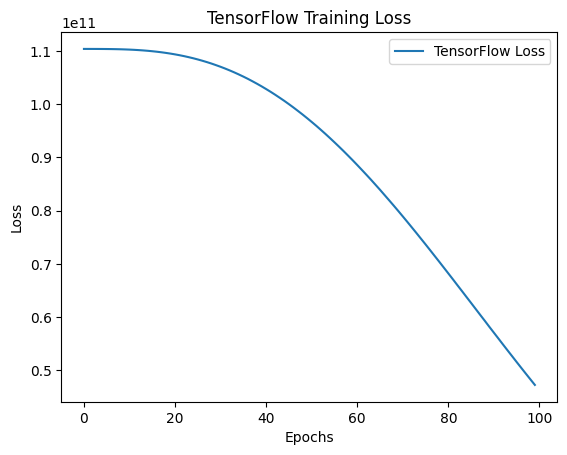

In [17]:
# Plot loss history for TensorFlow
plt.plot(history.history['loss'], label='TensorFlow Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('TensorFlow Training Loss')
plt.legend()
plt.show()

Berdasarkan dua grafik di atas, pada sumbu-x merupakan epoch yang menunjukkan jumlah iterasi pelatihan, di mana semakin banyak epoch, semakin lama model melatih. Sumbu-y merupakan loss, yang menunjukkan nilai fungsi loss atau kesalahan prediksi model pada setiap iterasi epoch.  

Pada grafik pertama yang menunjukkan PyTorch Training Loss, terlihat bahwa loss mengalami penurunan yang stabil dan bertahap, dengan kurva yang lebih landai setelah sekitar epoch ke-60. Ini menunjukkan bahwa model belajar dengan kecepatan yang stabil tanpa perubahan drastis dalam loss.  

grafik kedua yang menunjukkan TensorFlow Training Loss memperlihatkan pola penurunan yang lebih cepat dibandingkan PyTorch. Loss mengalami penurunan signifikan dalam 20 epoch pertama dan terus menurun hingga mendekati nilai yang lebih rendah dengan kecepatan yang tinggi. Hal ini menunjukkan bahwa model yang dilatih dengan TensorFlow lebih cepat dalam menangkap pola data dan konvergen lebih awal dibandingkan PyTorch.  

Dari kedua grafik ini dapat disimpulkan bahwa TensorFlow lebih cepat dalam belajar pola data, tetapi ada potensi risiko overfitting jika loss turun terlalu cepat tanpa stabilisasi yang cukup. Di sisi lain, PyTorch menunjukkan pola penurunan yang lebih stabil dan bertahap, yang dapat mengindikasikan model yang lebih generalis tetapi membutuhkan lebih banyak epoch atau tuning hyperparameter agar lebih optimal.